# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Anato\AppData\Local\Temp\ipykernel_7612\3348374475.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


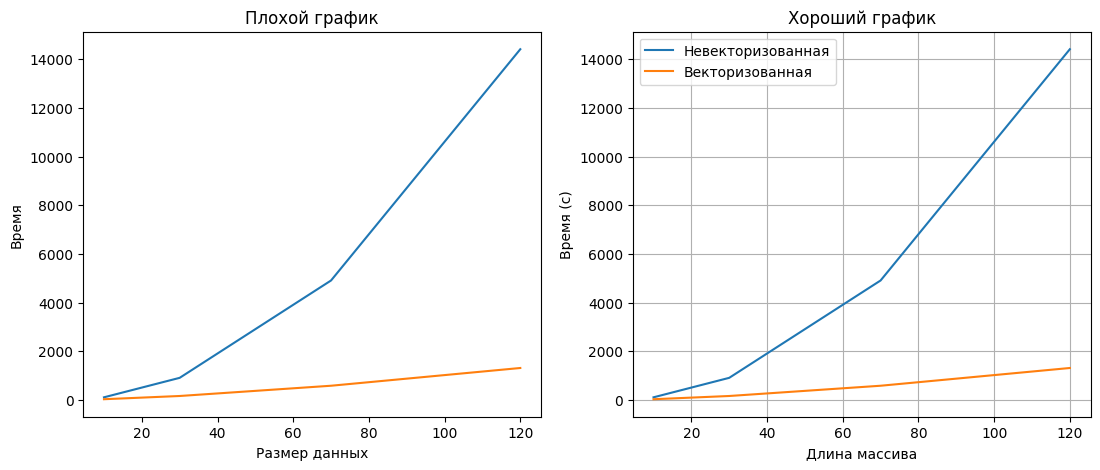

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
 * 

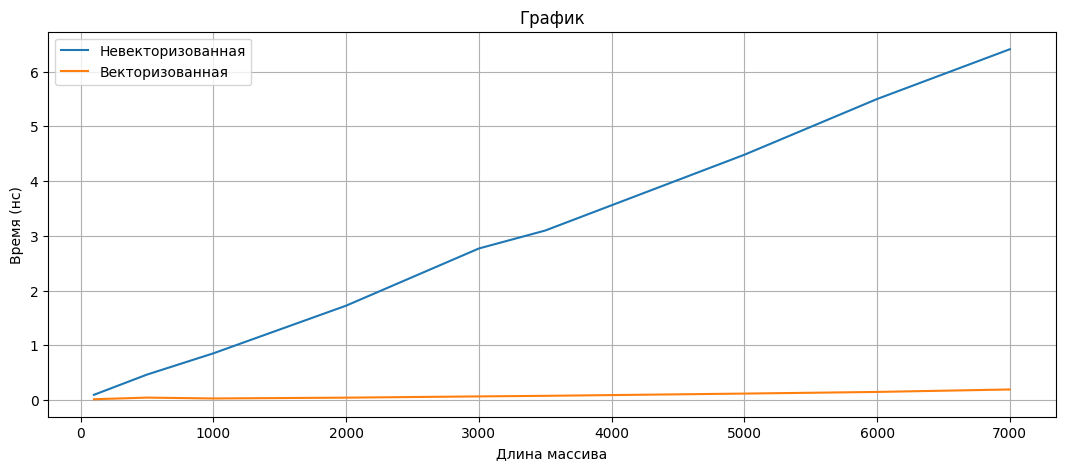

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit
from functions import prod_non_zero_diag as nonv
from functions_vectorized import prod_non_zero_diag as v
%matplotlib inline

sizes = [100,500, 1000,2000,3000,3500, 5000, 6000, 7000 ]
list_nonv = []
list_v = []

for i in sizes:
    m1 = np.array([[np.random.rand() for j in range(i)] for k in range(i)])
    m2 = m1    
    
    time1 = timeit.timeit(lambda: nonv(m1), number=5) #time.monotonic_ns()
   # nonv(m1)
    #end =int(round(time.time() * 1000)) #time.monotonic_ns()
    #time1 = (end - start)
    list_nonv.append(time1)
    
    
    time1 = timeit.timeit(lambda: v(m2), number=5) #time.monotonic_ns()
   # v(m2)
   #end =int(round(time.time() * 1000)) #time.monotonic_ns()
 #   time1 = (end - start)
    list_v.append(time1)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_nonv), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_v), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (мс)")
ax.grid()
ax.legend()
    
    

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


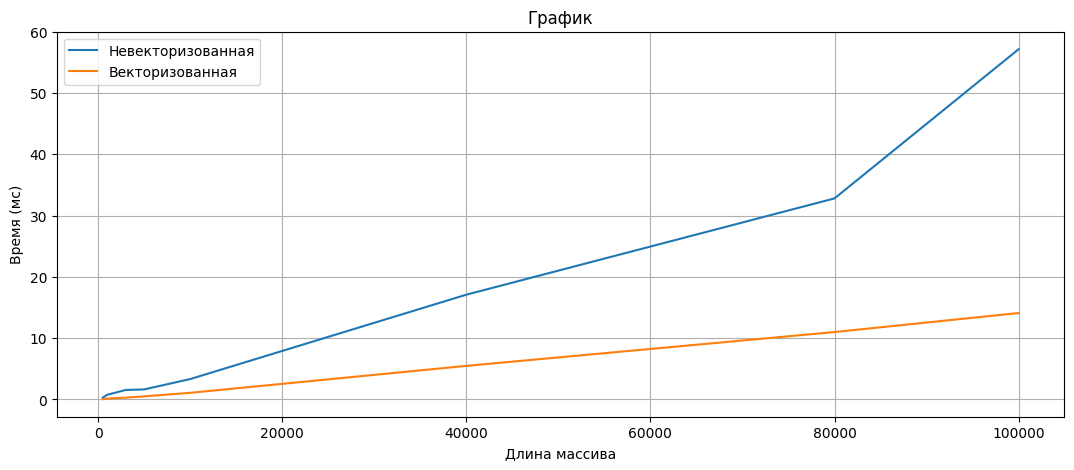

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from functions import are_multisets_equal as nonv
from functions_vectorized import are_multisets_equal as v

%matplotlib inline

sizes = [500, 1000, 3000, 5000, 10000, 40000, 80000, 100000]
list_nonv = []
list_v = []

for i in sizes:
    m1 = np.array(np.random.randint(-1e9,1e9,i, dtype='int64'))
    m2 = np.array(np.random.randint(-1e9,1e9,i, dtype='int64'))
    m3 = m1
    m4 = m2
    time1 = timeit.timeit(lambda: nonv(m1,m2), number=5)
    list_nonv.append(time1)

    time1 = timeit.timeit(lambda: v(m3,m4), number=5)
    list_v.append(time1)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_nonv), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_v), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (мс)")
ax.grid()
ax.legend()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

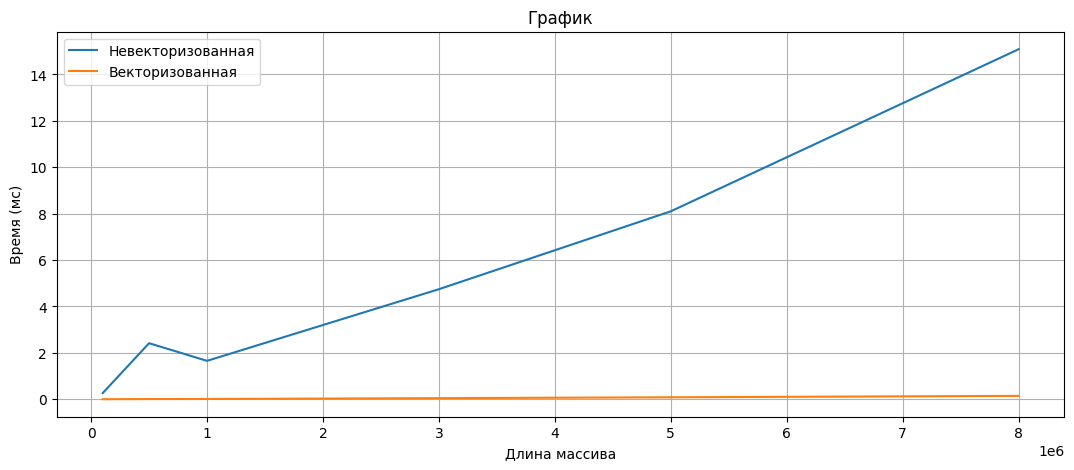

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from functions import max_after_zero as nonv
from functions_vectorized import max_after_zero as v

%matplotlib inline

sizes = [100000,500000, 1000000, 3000000, 5000000, 8000000]
list_nonv = []
list_v = []

for i in sizes:
    m1 = np.array(np.random.randint(-2,2,i, dtype='int32'))
    m2 = np.array(m1)
    #print(m1)
    
    time1 = timeit.timeit(lambda: nonv(m1), number=5)
    list_nonv.append(time1)

   
    time1 = timeit.timeit(lambda: v(m2), number=5)
    list_v.append(time1)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_nonv), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_v), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (мс)")
ax.grid()
ax.legend()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


time non-vectorized: 102226300 ns
time vectorized: 0 ns


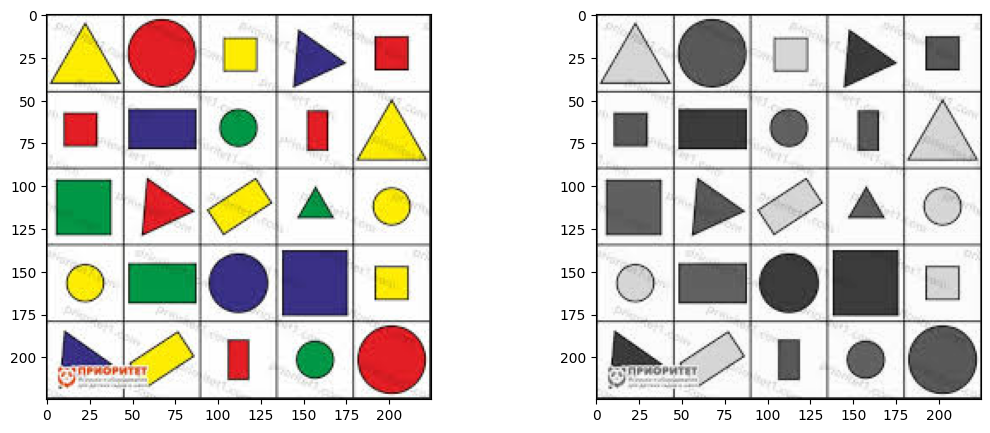

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import imageio.v2 as imageio
from functions import convert_image as nonv
from functions_vectorized import convert_image as v
coefs = np.array([0.299, 0.587, 0.114])

image1_v = imageio.imread('image.jpg')
image1 = image1_v.tolist()

start1 = time.time_ns()
image2 = nonv(image1, coefs)
end1 = time.time_ns()

start2 = time.time_ns()
image3 = v(image1_v, coefs)
end2 = time.time_ns()

print("time non-vectorized: {} ns".format(end1 - start1))
print("time vectorized: {} ns".format(end2 - start2))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
img1 = Image.open("image.jpg")
ax1.imshow(img1)
img2 = Image.fromarray(np.array(image2))
ax2.imshow(img2)

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

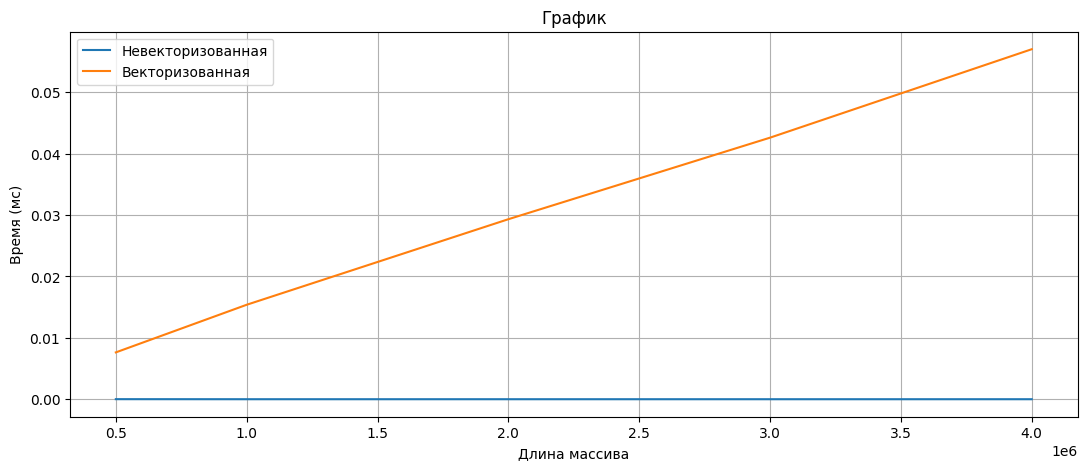

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from functions import run_length_encoding as nonv
from functions_vectorized import run_length_encoding as v

%matplotlib inline

sizes = [500000, 1000000, 2000000, 3000000, 4000000]
list_nonv = []
list_v = []

for i in sizes:
    m1 = np.array([np.random.randint(-1e9,1e9,i, dtype='int64')])
    m2 = np.array(m1)
    
    time = timeit.timeit(lambda: nonv(m1), number=5)
    list_nonv.append(time)

    time = timeit.timeit(lambda: v(m2), number=5)
    list_v.append(time)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_nonv), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_v), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (мс)")
ax.grid()
ax.legend()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

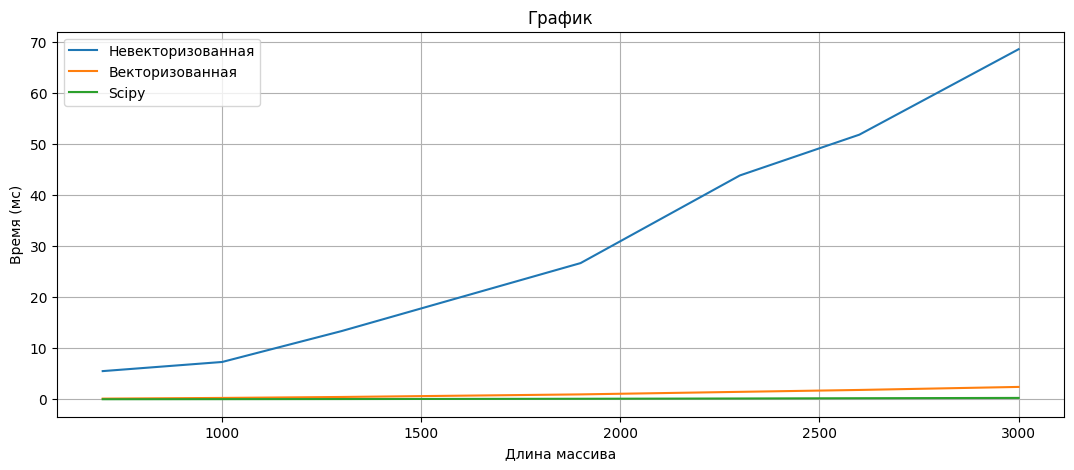

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from functions import pairwise_distance as nonv
from functions_vectorized import pairwise_distance as vec
from functions_vectorized import pairwise_distance_scipy as scipy

%matplotlib inline

sizes = [700, 1000, 1300, 1900, 2300, 2600, 3000]
list_nonv = []
list_vec = []
list_scipy = []

for i in sizes:
    m1 = [[np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)]  for j in range(i)]
    m2 = [[np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)]  for j in range(i)]
    m3= np.array(m1)
    m4 = np.array(m2)
    
  
    time = timeit.timeit(lambda: nonv(m1,m2), number=5)
    list_nonv.append(time)
   # print(list_nonv)
    time = timeit.timeit(lambda: vec(m3,m4), number=5)
    list_vec.append(time)
    
    time = timeit.timeit(lambda: scipy(m3,m4), number=5) 
    list_scipy.append(time)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_nonv), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_vec), label=u"Векторизованная")
ax.plot(sizes, np.array(list_scipy), label=u"Scipy")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (мс)")
ax.grid()
ax.legend()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

Несмотря на **невероятно** своевременную сдачу данной работы, надеюсь это не бесполезно. Много математики, а я ведь __не то чтобы__ информат.
>Повторяя легендарную цитату: это не то чтобы бесполезно...
> 
Уж простите и поймите, линал и градиенты (только в 3х мерном пространстве. Пока что.) я знаю, понимаю и использую, но тут это дальше прогать надо...

Выводы: 
* Numpy гораздо быстрее работает
* Numpy гораздо быстрее пишется и его реализация компактна (_т.е. ограничена и замкнута, ха-ха_)
* Мне бы хотя бы 3 за год...
